was the 1970 draft randomized properly?
---------------------------------------

see [here](http://science.sciencemag.org/content/sci/171/3968/255.full.pdf) for an in-depth explanation

grabbed a data table from the [draft service](https://web.archive.org/web/20120915232321/http://www.sss.gov/LOTTER8.HTM) directly

let's take a look for ourselves

also [this](http://pharma-bi.com/2009/10/expanding-our-visual-vocabulary/)

In [1]:
import re

In [2]:
re.findall(r">([0-9\;\-A-Za-z]+)<","<th bgcolor=\"#C0C0C0\"><font size=\"2\" face=\"Arial, Helvetica, sans-serif\">Jan</font></th>")

['Jan']

In [3]:
f = open("data.html","r")
data = []
for line in f:
    # print(line)
    m = re.findall(r">([0-9\;\&\-A-Za-z]+?)<",line)
    if m:
        # print(m[-1])
        data.append(m[-1])
f.close()

In [4]:
len(data)

416

In [5]:
32*13

416

In [6]:
days_of_month = [data[(i*13):((i+1)*13)] for i in range(32)]

In [7]:
days_of_month[0]

['&nbsp;',
 'Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

In [8]:
len(days_of_month[0])

13

In [9]:
days_of_month[-1]

['31',
 '211',
 '&nbsp;----',
 '030',
 '----',
 '313',
 '----',
 '193',
 '011',
 '&nbsp;----',
 '079',
 '&nbsp;----',
 '100']

In [10]:
import datetime

In [11]:
day = datetime.date(1970,1,1)
dates = []
formatted_data = []
while day < datetime.date(1971,1,1):
    dates.append(day.timetuple().tm_yday)
    formatted_data.append(int(days_of_month[day.day][day.month]))
    day+=datetime.timedelta(days=1)

In [12]:
for x in zip(dates,formatted_data):
    print(x)

(1, 305)
(2, 159)
(3, 251)
(4, 215)
(5, 101)
(6, 224)
(7, 306)
(8, 199)
(9, 194)
(10, 325)
(11, 329)
(12, 221)
(13, 318)
(14, 238)
(15, 17)
(16, 121)
(17, 235)
(18, 140)
(19, 58)
(20, 280)
(21, 186)
(22, 337)
(23, 118)
(24, 59)
(25, 52)
(26, 92)
(27, 355)
(28, 77)
(29, 349)
(30, 164)
(31, 211)
(32, 86)
(33, 144)
(34, 297)
(35, 210)
(36, 214)
(37, 347)
(38, 91)
(39, 181)
(40, 338)
(41, 216)
(42, 150)
(43, 68)
(44, 152)
(45, 4)
(46, 89)
(47, 212)
(48, 189)
(49, 292)
(50, 25)
(51, 302)
(52, 363)
(53, 290)
(54, 57)
(55, 236)
(56, 179)
(57, 365)
(58, 205)
(59, 299)
(60, 108)
(61, 29)
(62, 267)
(63, 275)
(64, 293)
(65, 139)
(66, 122)
(67, 213)
(68, 317)
(69, 323)
(70, 136)
(71, 300)
(72, 259)
(73, 354)
(74, 169)
(75, 166)
(76, 33)
(77, 332)
(78, 200)
(79, 239)
(80, 334)
(81, 265)
(82, 256)
(83, 258)
(84, 343)
(85, 170)
(86, 268)
(87, 223)
(88, 362)
(89, 217)
(90, 30)
(91, 32)
(92, 271)
(93, 83)
(94, 81)
(95, 269)
(96, 253)
(97, 147)
(98, 312)
(99, 219)
(100, 218)
(101, 14)
(102, 346)
(103, 1

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.5/site-packages/matplotlib/__init__.py:1076: UserWarning: Bad val "cycler('color', ['" on line #35
	"axes.prop_cycle: cycler('color', ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628','#f781bf'])
"
	in file "/Users/andyreagan/.matplotlib/stylelib/paper-onecol.mplstyle"
	Key axes.prop_cycle: 'cycler('color', ['' is not a valid cycler construction: EOL while scanning string literal (<string>, line 1)
  (val, error_details, msg))
/usr/local/lib/python3.5/site-packages/matplotlib/__init__.py:1076: UserWarning: Bad val "cycler('color', ['" on line #35
	"axes.prop_cycle: cycler('color', ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628','#f781bf'])
"
	in file "/Users/andyreagan/.matplotlib/stylelib/paper-twocol.mplstyle"
	Key axes.prop_cycle: 'cycler('color', ['' is not a valid cycler construction: EOL while scanning string literal (<string>, line 1)
  (val, error_details, msg))


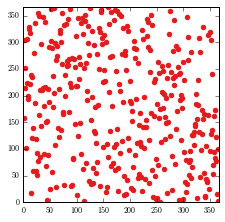

In [14]:
with plt.style.context("paper-onecol"):
    plt.scatter(dates,formatted_data,color='#e41a1c')
    plt.xlim([0,366])
    plt.ylim([0,366])

In [15]:
from scipy.stats import pearsonr

In [16]:
pearsonr(dates,formatted_data)

(-0.22355549385377366, 1.6247770075091187e-05)

so, there was a correlation here!

this was, of course, due to random chance and the very unlikely draw made by draft.
the p-value tells us that this correlation is indeed very unlikely.
would have been better to make a shuffling without correlation, but how is this any less random (in the global sense) than just
assigning the draft number based on birth day (a rho=1 correlation)?

i don't think it is. birth days are essentially random to begin with (you don't choose this). but on the other hand, you can't change it. and this is literally a life and death draw for many.